In [1]:
from mainn import *
from read_F import *
import numpy as np
import matplotlib.pyplot as plt
import time

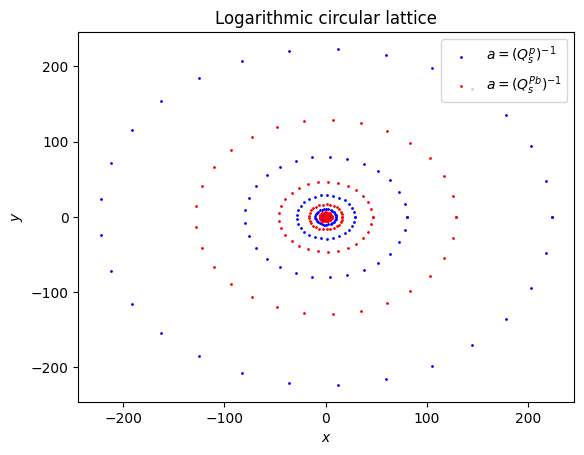

In [23]:
x, y = zip(*lattice(Q_s_p, 10))
plt.scatter(x, y, s=1, color = 'blue', label = "$a = (Q_s^{p})^{-1}$")
x2, y2 = zip(*lattice(Q_s_pb, 10))
plt.scatter(x2, y2, s=1, color = 'red', label = "$a = (Q_s^{Pb})^{-1}$")
plt.title(r"Logarithmic circular lattice")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

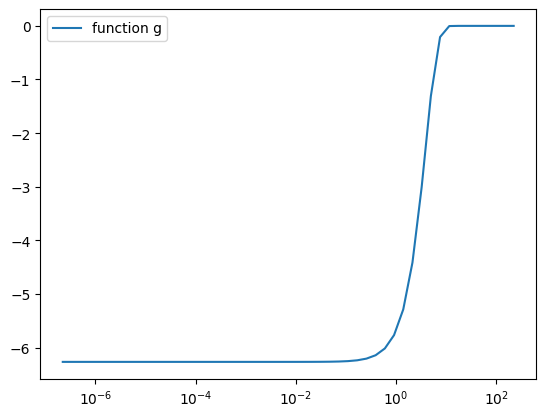

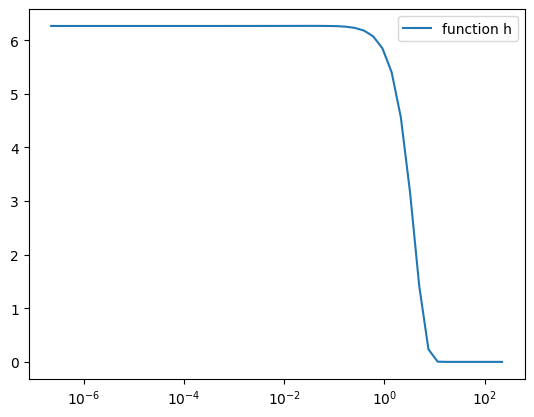

sum = 2.159631051767974e-08


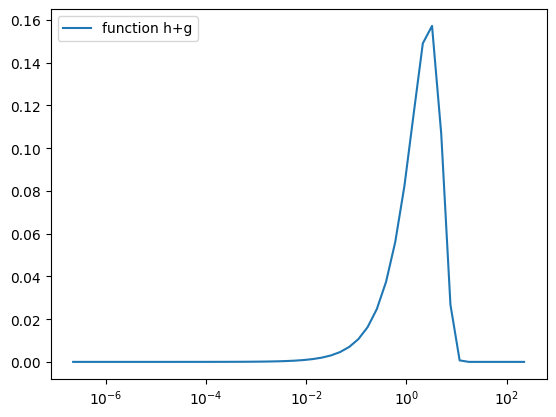

deviation h = -0.01675513923121219
deviation g = 0.016755160827522708


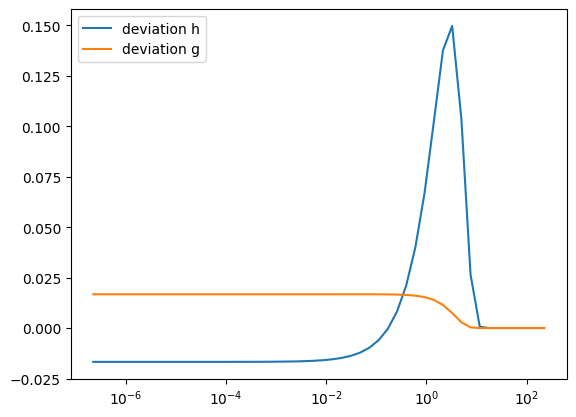

In [2]:
r_0 = r0(Q_s_p)
r_list = r_0*np.logspace(-7, 2, 50)
r_list_prime = r_0*np.logspace(-3, -1, 50)
r = 100*r_0

N_list = vectorize_function(r_list, N_mv_0)


def N(rr):
    if rr < r_list[0]:
        factor = (rr/r_list[0])**2
        return factor*N_list[0]
    if rr > r_list[-1]:
        denominator = 1-np.exp((np.log(r_list[-1]))**2)
        numerator = 1-np.exp((np.log(rr))**2)
        ratio = numerator/denominator
        return ratio*N_list[-1]
        #return 1
    j = find_closest_r_index(r_list, rr)
    return N_list[j]

g_plot = [g(r, r1, N_list, r_list) for r1 in r_list]
plt.semilogx(r_list, g_plot, label='function g')
plt.legend()
plt.show()

h_plot = [h(r, r1, N_list, r_list) for r1 in r_list]
plt.semilogx(r_list, h_plot, label='function h')
plt.legend()
plt.show()

sum_plot = [h_plot[i] + g_plot[i] for i in range(len(r_list))]
print(f"sum = {sum_plot[0]}")
plt.semilogx(r_list, sum_plot, label='function h+g')
plt.legend()
plt.show()

deviation_h = [h(r, r1, N_list, r_list) - 2*np.pi*(1-N(r1)) for r1 in r_list]
deviation_g = [g(r, r1, N_list, r_list) + 2*np.pi*(1-N(r1)) for r1 in r_list]
print(f"deviation h = {deviation_h[0]}")
print(f"deviation g = {deviation_g[0]}")
plt.semilogx(r_list, deviation_h, label='deviation h')
plt.semilogx(r_list, deviation_g, label='deviation g')
plt.legend()
plt.show()

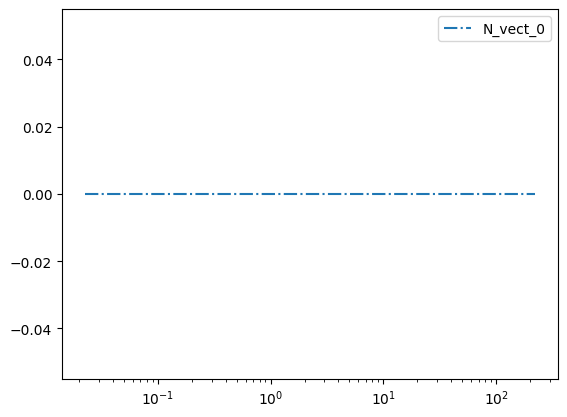

In [13]:
N_list = [N_mv_0(r) for r in r_list]

def N(rr):
    if rr < r_list[0]:
        return 0
    if rr > r_list[-1]:
        return 1
    j = find_closest_r_index(r_list, rr)
    return N_list[j]

N_rr_vect = [N(rr) for rr in r_list]
# plt.semilogx(r_list, N_list, label = 'exact')
# plt.semilogx(r_list, N_rr_vect, label = 'approx',linestyle='--')
plt.semilogx(r_list, [N_list[i]-N_rr_vect[i] for i in range(len(r_list))], label = 'N_vect_0',linestyle='-.')
plt.legend()
plt.show()

In [17]:
r_0 = r0(Q_s_pb)
r_list = r_0*np.logspace(-4, 2, 80)
y0 = 0
yf = 5
dy = 0.1
N_0 = N_mv_0
y_list, N_sol = solve_rcBK_euler(N_0, y0, yf, dy, r_list)


for r=0.00012909944487358058 we have bigterm = 2.1539979108132285e-08
for r=0.0001537707532940186 we have bigterm = 2.9245588830013207e-08
for r=0.0001831568260557938 we have bigterm = 4.0551701847201486e-08
for r=0.00021815866939722665 we have bigterm = 5.501406980682123e-08
for r=0.00025984947467188826 we have bigterm = 7.624034857695752e-08
for r=0.00030950752346362975 we have bigterm = 1.0320174689948081e-07
for r=0.0003686553809721927 we have bigterm = 1.4293918221952675e-07
for r=0.00043910657937761975 we have bigterm = 1.931646471330718e-07
for r=0.0005230212225418662 we have bigterm = 2.669795279453024e-07
for r=0.0006229722169431256 we have bigterm = 3.6018622164883963e-07
for r=0.0007420241595492179 we have bigterm = 4.977645500986645e-07
for r=0.0008838273014107631 we have bigterm = 6.701309877028947e-07
for r=0.0010527294679914243 we have bigterm = 9.248582154342798e-07
for r=0.0012539093678239383 we have bigterm = 1.2419579873769425e-06
for r=0.0014935353768680086 we have 

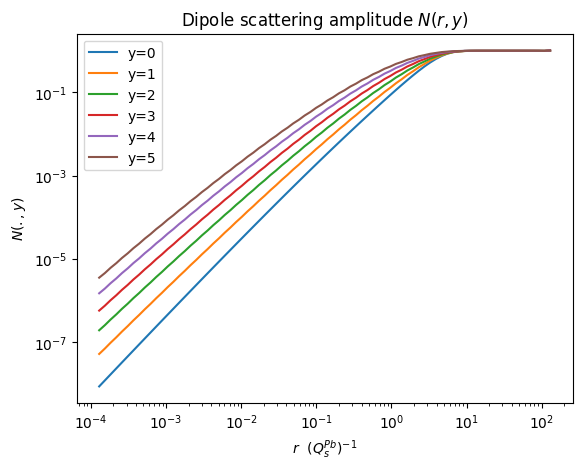

1.017388036896442
1.0


In [21]:
N_sol_0 = N_sol[0]
plt.semilogx(r_list, N_sol_0, label='y=0')
for i in range(1, 6):
    plt.loglog(r_list, N_sol[10*i], label=f'y={i}')
plt.title(r"Dipole scattering amplitude $N(r, y)$")
plt.xlabel(r"$r \ \ (Q_s^{Pb})^{-1}$")
plt.ylabel(r"$N(., y)$")
plt.legend()
plt.show()
# plt.semilogx(r_list, bigN[0], label='y=0')
# i = 8
# plt.semilogx(r_list, bigN[i], label=f'y={y_vect[i]}')
# plt.show()
print(N_sol[-1][-1])
print(N_sol[0][-1])

In [2]:
r_0 = r0(Q_s_p)
r_list = r_0*np.logspace(-4, 2, 80)
y0 = 0
yf = 2
dy = 0.05
N_0 = N_mv_0
y_list, N_sol = solve_rcBK_ivp(N_0, y0, yf, r_list)

for r=0.000223606797749979 we have bigterm = 5.765319366304835e-08
for r=0.0002663387574233795 we have bigterm = 7.81277347696201e-08
for r=0.00031723692848169006 we have bigterm = 1.0826139246620119e-07
for r=0.0003778618995076182 we have bigterm = 1.465449566524475e-07
for r=0.0004500724924517926 we have bigterm = 2.0291628305231578e-07
for r=0.0005360827559638231 we have bigterm = 2.7398961987829654e-07
for r=0.0006385298503274986 we have bigterm = 3.7912235972378145e-07
for r=0.0007605549054198137 we have bigterm = 5.109755611034413e-07
for r=0.0009058993308793009 we have bigterm = 7.053104684910191e-07
for r=0.0010790195314493145 we have bigterm = 9.488082986176394e-07
for r=0.0012852235447828404 we have bigterm = 1.3093211734066622e-06
for r=0.001530833791159934 we have bigterm = 1.7574035733797662e-06
for r=0.0018233809251861014 we have bigterm = 2.4216745198582884e-06
for r=0.0021718347331576332 we have bigterm = 3.2411669561826012e-06
for r=0.002586879155636922 we have bigterm

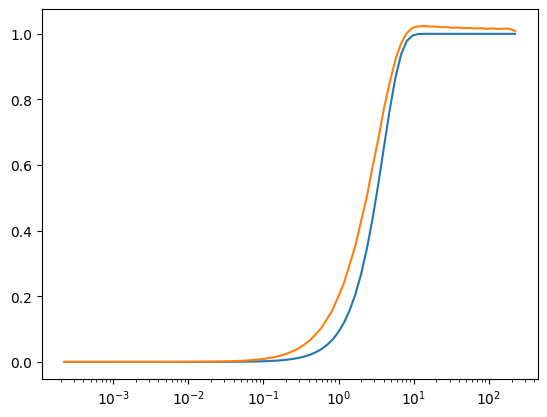

In [8]:
plt.semilogx(r_list, N_sol[:,0], label='y=0')
plt.semilogx(r_list, N_sol[:,-1], label=f'y={yf}')

# TMDS

Text(0.5, 1.0, '$F(x_2=x_0, k_t)$ vs $k_t$')

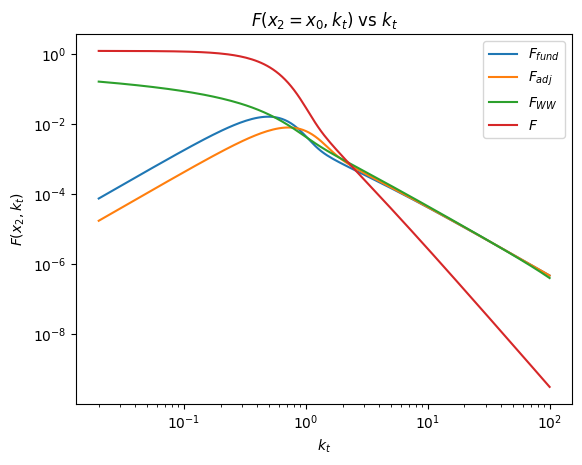

In [2]:
# Plot the fitted functions
y2 = 0
plt.loglog(kt_values, [F_fund(y2, data_proton)(kt) for kt in kt_values], label = '$F_{fund}$')
plt.loglog(kt_values, [F_adj(y2, data_proton)(kt) for kt in kt_values], label = '$F_{adj}$')
plt.loglog(kt_values, [F_WW(y2, data_proton)(kt) for kt in kt_values], label = '$F_{WW}$')
plt.loglog(kt_values, [F(y2, data_proton)(kt) for kt in kt_values], label = '$F$')
plt.legend()
plt.xlabel(r'$k_t$')
plt.ylabel(r'$F(x_2, k_t)$')
plt.title(r'$F(x_2=x_0, k_t)$ vs $k_t$')

----------------Computing F_qg^(2) for y2 = 0-----------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


kt = 0.02 done, result = 0.030348606678893164
kt = 0.0211685 done, result = 0.03049390761138871
kt = 0.0224052 done, result = 0.030486691782325936
kt = 0.0237143 done, result = 0.030478774333873665
kt = 0.0250997 done, result = 0.030470197525069576
kt = 0.0265662 done, result = 0.030460786522703877
kt = 0.0281183 done, result = 0.030465557221685723
kt = 0.0297611 done, result = 0.030461635878014988
kt = 0.0314998 done, result = 0.03035180908663171
kt = 0.0333402 done, result = 0.030338000939885472
kt = 0.0352881 done, result = 0.03044070729148445
kt = 0.0373498 done, result = 0.030427359357957522
kt = 0.0395319 done, result = 0.03043656094464218
kt = 0.0418415 done, result = 0.030287940292448322
kt = 0.0442861 done, result = 0.030389349725735072
kt = 0.0468735 done, result = 0.030385070603603886
kt = 0.049612 done, result = 0.030358024904853325
kt = 0.0525106 done, result = 0.030344249444567702
kt = 0.0555784 done, result = 0.030178164945895182
kt = 0.0588256 done, result = 0.030123555

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


kt = 11.5592 done, result = 3.474126473089579e-05
kt = 12.2345 done, result = 3.111224492339525e-05
kt = 12.9493 done, result = 2.773075855856054e-05
kt = 13.7059 done, result = 2.4822981340165966e-05
kt = 14.5066 done, result = 2.218642259167386e-05
kt = 15.3542 done, result = 1.98200764965664e-05
kt = 16.2512 done, result = 1.7709102747721978e-05
kt = 17.2007 done, result = 1.5819069302937035e-05
kt = 18.2056 done, result = 1.4132347145442546e-05
kt = 19.2693 done, result = 1.2627280220024257e-05
kt = 20.3951 done, result = 1.1274110746879114e-05
kt = 21.5867 done, result = 1.0120247720324903e-05
kt = 22.8478 done, result = 8.9826861172257e-06
kt = 24.1827 done, result = 8.01533174738399e-06
kt = 25.5956 done, result = 7.16187869276092e-06
kt = 27.091 done, result = 6.393850030705233e-06
kt = 28.6737 done, result = 5.698235848679037e-06
kt = 30.349 done, result = 5.082452153242791e-06
kt = 32.1221 done, result = 4.536366248943612e-06
kt = 33.9988 done, result = 4.041631072715845e-06


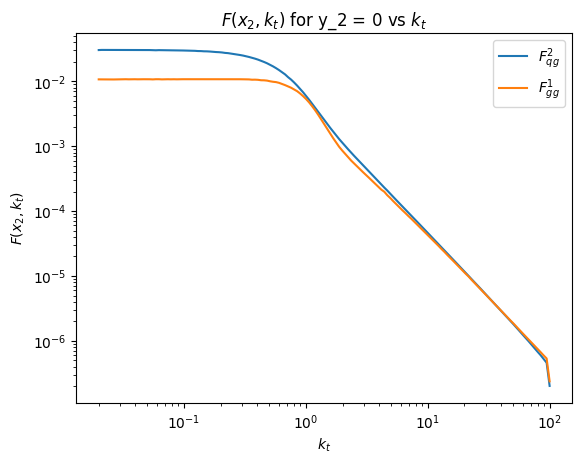

----------------Computing F_qg^(2) for y2 = 5-----------------
kt = 0.02 done, result = 0.038488381361757966
kt = 0.0211685 done, result = 0.03850058345709756
kt = 0.0224052 done, result = 0.03848930042479899
kt = 0.0237143 done, result = 0.03845993914925656
kt = 0.0250997 done, result = 0.038468067897604985
kt = 0.0265662 done, result = 0.038471013231268024
kt = 0.0281183 done, result = 0.0384803611832282
kt = 0.0297611 done, result = 0.038498080463656596
kt = 0.0314998 done, result = 0.038476119993755956
kt = 0.0333402 done, result = 0.038477487660134736
kt = 0.0352881 done, result = 0.03841389600644773
kt = 0.0373498 done, result = 0.03830963350107228
kt = 0.0395319 done, result = 0.03833234391443953
kt = 0.0418415 done, result = 0.038413497489839306
kt = 0.0442861 done, result = 0.038380769822826316
kt = 0.0468735 done, result = 0.038235430869860004
kt = 0.049612 done, result = 0.03827973626119058
kt = 0.0525106 done, result = 0.0384064891270459
kt = 0.0555784 done, result = 0.0382

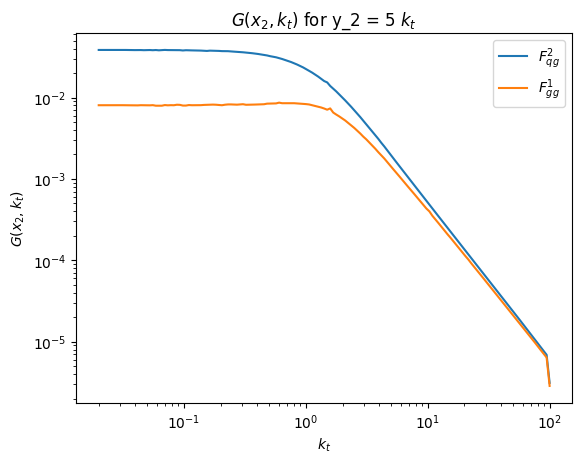

In [ ]:
y2 = 0
F_0, G_0 = F_qg_2(y2), F_gg_1(y2)

plt.loglog(kt_values, [F_0(kt) for kt in kt_values], label = '$F_{qg}^2$')
plt.loglog(kt_values, [G_0(kt) for kt in kt_values], label = '$F_{gg}^1$')
plt.legend()
plt.xlabel(r'$k_t$')
plt.ylabel(r'$F(x_2, k_t)$')
plt.title(f'$F(x_2, k_t)$ for y_2 = 0 vs $k_t$')
plt.show()


y2 = 5
F_5, G_5 = F_qg_2(y2), F_gg_1(y2)

plt.loglog(kt_values, [F_5(kt) for kt in kt_values], label = '$F_{qg}^2$')
plt.loglog(kt_values, [G_5(kt) for kt in kt_values], label = '$F_{gg}^1$')
plt.legend()
plt.xlabel(r'$k_t$')
plt.ylabel(r'$G(x_2, k_t)$')
plt.title(r'$G(x_2, k_t)$ for y_2 = 5 $k_t$')
plt.show()

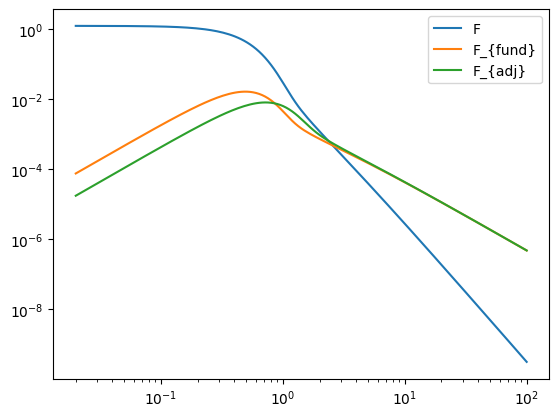

In [ ]:
plt.loglog(kt_values, [F(y2)(kt) for kt in kt_values], label = 'F')
plt.loglog(kt_values, [F_fund(y2)(kt) for kt in kt_values], label = 'F_{fund}')
plt.loglog(kt_values, [F_adj(y2)(kt) for kt in kt_values], label = 'F_{adj}')
plt.legend()

In [ ]:
y2 = 0
F1 = F(y2)
F_fund1 = F_fund(y2)
results = []
sum = 0
n_samples = 10000
for i in range(n_samples):
    r = np.random.rand() * (max_kt)
    sum += r*F1(r) * F_fund1(r)
results.append(2*np.pi*sum*max_kt/n_samples)
print(results)

[0.011714478414078147]


$$ \int d^2 q FF(q) = 2 \pi \int q dq FF(q) = 2 \pi k_m \int_0^{k_m} \frac{q}{k_m} FF(q) = 2 \pi k_m E(qFF(q)) = 2 \pi k_m 1/n_s \sum_{i=0}^{n_s} q_i FF(q_i)$$

In [ ]:
def lattice(Q_s: float, # Saturation scale
            M: int = 1000 # Number of points in one axis 
            ):
    """Creates a lattice of points in the transverse plane of spacing 0.01/Q_s and size 100/Q_s"""
    # Lattice parameters
    r0 =  1/Q_s 
    a = 0.01*r0  # Lattice spacing
    L = 100*r0  # Lattice size
    x_min, x_max = -L/2, L/2
    y_min, y_max = -L/2, L/2

    # Create a grid of points
    x = np.linspace(x_min, x_max, M)
    y = np.linspace(y_min, y_max, M)
    X, Y = np.meshgrid(x, y)

    # Optionally, create r vectors if needed for vector operations
    R = np.array([X.flatten(), Y.flatten()]).T  # Each row is an (x, y) pair
    return R

def info_lattice(R: np.ndarray):
    """"Finds if the difference of two vectors in the lattice is in the lattice"""
    n_points = len(R)
    info_matrix = np.zeros((n_points, n_points))
    for i in range(n_points):   
        for j in range(n_points):
            diff_vect = R[i]-R[j]
            if diff_vect in R:
                #finds the index of diff_vect
                info_matrix[i, j] = np.where(R==diff_vect)[0][0]
            else:
                info_matrix[i, j] = -1
    return info_matrix

In [ ]:
from scipy.integrate import solve_ivp

def f(t, y):
    return np.array([y[0], -y[1]])

y0 = np.array([1, 0])

sol = solve_ivp(f, [0, 2], y0, t_eval = [0, 1, 2])

In [ ]:
sol.y

array([[1.        , 2.71819429, 7.38930088],
       [0.        , 0.        , 0.        ]])